In [2]:
import numpy as np
import pandas as pd
from sklearn.tree import export_graphviz
from graphviz import Source,Digraph
from sklearn.tree import DecisionTreeClassifier

In [3]:
array = np.arange(80)
data = pd.DataFrame(array)

In [4]:
data['stages'] = 0
data['X'] = 0

In [5]:
data.loc[0:20,'stages'] = data.loc[0:20,'stages'].apply(lambda x: [1,2,4])
data.loc[20:40,'stages']= data.loc[20:40,'stages'].apply(lambda x: [1,3,4])
data.loc[40:60,'stages']= data.loc[40:60,'stages'].apply(lambda x: [1,3,5,4])
data.loc[60:80,'stages']= data.loc[60:80,'stages'].apply(lambda x: [1,4])

data.loc[0:20,'X'] = data.loc[0:20,'X'].apply(lambda x:np.random.randint(-10,-1))
data.loc[20:40,'X'] = data.loc[20:40,'X'].apply(lambda x:np.random.randint(1,9))
data.loc[40:60,'X'] = data.loc[40:60,'X'].apply(lambda x:0)
data.loc[60:80,'X'] = data.loc[60:80,'X'].apply(lambda x:np.random.randint(10,20))

In [6]:
data = data.explode('stages')

In [7]:
data = data.rename(columns = {0:'id'})

In [8]:
data.shape

(240, 3)

In [9]:
dot = Digraph(comment='Process',format = 'pdf')
for i in [1,2,3,4,5]:
    dot.node(str(i))

In [11]:
dot.body

['\t1', '\t2', '\t3', '\t4', '\t5']

In [131]:
from itertools import product
list(product([1,2,3],repeat = 2))

[(1, 1), (1, 2), (1, 3), (2, 1), (2, 2), (2, 3), (3, 1), (3, 2), (3, 3)]

In [12]:
dot.edges(['12','13','24','34','14','35','54'])

In [ ]:
def function(df):
    df['from'] = df.groupby(['id'])['stages'].shift(1)
    
    return X,Y

In [13]:
data['from'] = data.groupby(['id'])['stages'].shift(1)

In [24]:
stages = [1,2,3,4,5]
list_id = []
for i in stages:
    transitions = list(filter(lambda x: '\t{} ->'.format(i) in x,dot.body))
    if len(transitions) > 1:
        print(transitions)
        list_nodes = list(map(lambda x: list(map(lambda s: int(s.strip()),x.strip().split("->"))),transitions))
    
        data_x_id = data.loc[data['stages'] == list_nodes[0][0],['id','X']]
        
        nodes = [node[1] for node in list_nodes]
        
        for param in nodes:
            mask_to = data['stages'] == param
            mask_from = data['from'] == list_nodes[0][0]
            mask = mask_to & mask_from
            list_id.append(data.loc[mask,['id']].values.reshape(-1))        
        
        for j in range(len(list_id)):
            data_x_id.loc[data_x_id['id'].isin(list_id[j]),'target'] = j    
        
        tree = DecisionTreeClassifier()    
        tree.fit(data_x_id['X'].values.reshape((-1,1)),data_x_id['target'])
        export_graphviz(tree, out_file='tree{}.dot'.format(i),
                feature_names=['X'],node_ids=True)

['\t1 -> 2', '\t1 -> 3', '\t1 -> 4']
['\t3 -> 4', '\t3 -> 5']


In [21]:
for i in range(len(list_id)):
    data_x_id.loc[data_x_id['id'].isin(list_id[i]),'target'] = i    

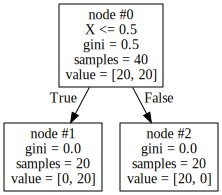

In [28]:
file = open('tree{}.dot'.format(3), 'r')#READING DOT FILE
text=file.read()
Source(text)

In [16]:
tree = DecisionTreeClassifier()

tree.fit(data_x_id['X'].values.reshape((-1,1)),data_x_id['target'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

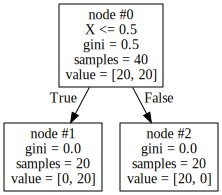

In [17]:
export_graphviz(tree, out_file='tree{}.dot'.format(i),
                feature_names=['X'],node_ids=True)
file = open('tree.dot', 'r')#READING DOT FILE
text=file.read()
Source(text)

In [229]:
graph.view()

'tree.dot.pdf'

In [ ]:
#dot.edge
data['stages']
stroka = ""
count = 0
for i in range(1,len(data['stages'])):       
    #print("\\t{} -> {}".format(str(data.iloc[i-1]['stages']), str(data.iloc[i]['stages'])))
    if "\\t{} -> {}".format(str(data.iloc[i-1]['stages']), str(data.iloc[i]['stages'])) not in dot.body:
        dot.edge(str(data.iloc[i-1]['stages']),str(data.iloc[i]['stages']))    
        